# Predictive Maintenance 


In [2]:
# Manipulação de dados
import pandas as pd

# Computação científica
import numpy as np

# Plotagem de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Filtro de Warnings
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
#Padronização
from sklearn.preprocessing import StandardScaler

##Seleção Univariada - f_classif
from sklearn.feature_selection import SelectKBest, f_classif

#Outliers
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error,  median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


#### Caregando o Dataset

In [27]:
columns_names =["Asset_id", "runtime", "Setting1", 'Setting2', 'Setting3', 'Tag1', 'Tag2', 'Tag3', 'Tag4', 
       'Tag5','Tag6', 'Tag7', 'Tag8', 'Tag9', 'Tag10', 'Tag11', 'Tag12', 'Tag13', 
       'Tag14', 'Tag15', 'Tag16', 'Tag17', 'Tag18', 'Tag19', 'Tag20', 'Tag21']

train = pd.read_csv('../data/PM_train.txt', header=None, delimiter=r"\s+", names=columns_names)
test = pd.read_csv('../data/PM_test.txt', header=None, delimiter=r"\s+", names=columns_names)

### Data Exploration

In [4]:
train.head()

,Asset_id,runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag12,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
test.head()

,Asset_id,runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag12,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [5]:
## verificando o tamanho do dataset
print(train.shape)
print(test.shape)

(20631, 26)
(13096, 26)


In [6]:
#verificando valores missing
print(train.isna().sum())

Asset_id    0
runtime     0
Setting1    0
Setting2    0
Setting3    0
Tag1        0
Tag2        0
Tag3        0
Tag4        0
Tag5        0
Tag6        0
Tag7        0
Tag8        0
Tag9        0
Tag10       0
Tag11       0
Tag12       0
Tag13       0
Tag14       0
Tag15       0
Tag16       0
Tag17       0
Tag18       0
Tag19       0
Tag20       0
Tag21       0
dtype: int64


In [7]:
## Verificando a quantidade de ciclos por id - entendimento da volumetria por id
df_cycle = train.groupby('Asset_id')['runtime'].count()
df_cycle = df_cycle.reset_index() 
df_cycle

,Asset_id,runtime
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


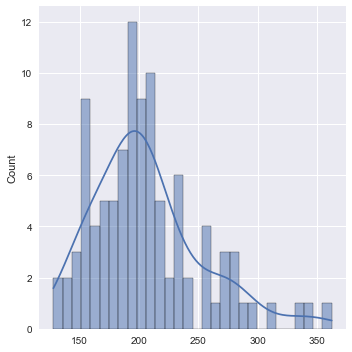

In [8]:
#Distribuição de frequencia dos ciclos máximos de cada asset
plt.style.use("seaborn")
x = df_cycle['runtime'].values
sns.displot(x, bins=30, kde=True)

In [13]:
print("Mínimo:", df_cycle['runtime'].min())
print("Média:", df_cycle['runtime'].mean())
print("Mediana:", df_cycle['runtime'].median())
print("Máximo:", df_cycle['runtime'].max())


Mínimo: 128
Média: 206.31
Mediana: 199.0
Máximo: 362


In [14]:
#verificando o tipo dos dados
train.dtypes

Asset_id      int64
runtime       int64
Setting1    float64
Setting2    float64
Setting3    float64
Tag1        float64
Tag2        float64
Tag3        float64
Tag4        float64
Tag5        float64
Tag6        float64
Tag7        float64
Tag8        float64
Tag9        float64
Tag10       float64
Tag11       float64
Tag12       float64
Tag13       float64
Tag14       float64
Tag15       float64
Tag16       float64
Tag17         int64
Tag18         int64
Tag19       float64
Tag20       float64
Tag21       float64
dtype: object

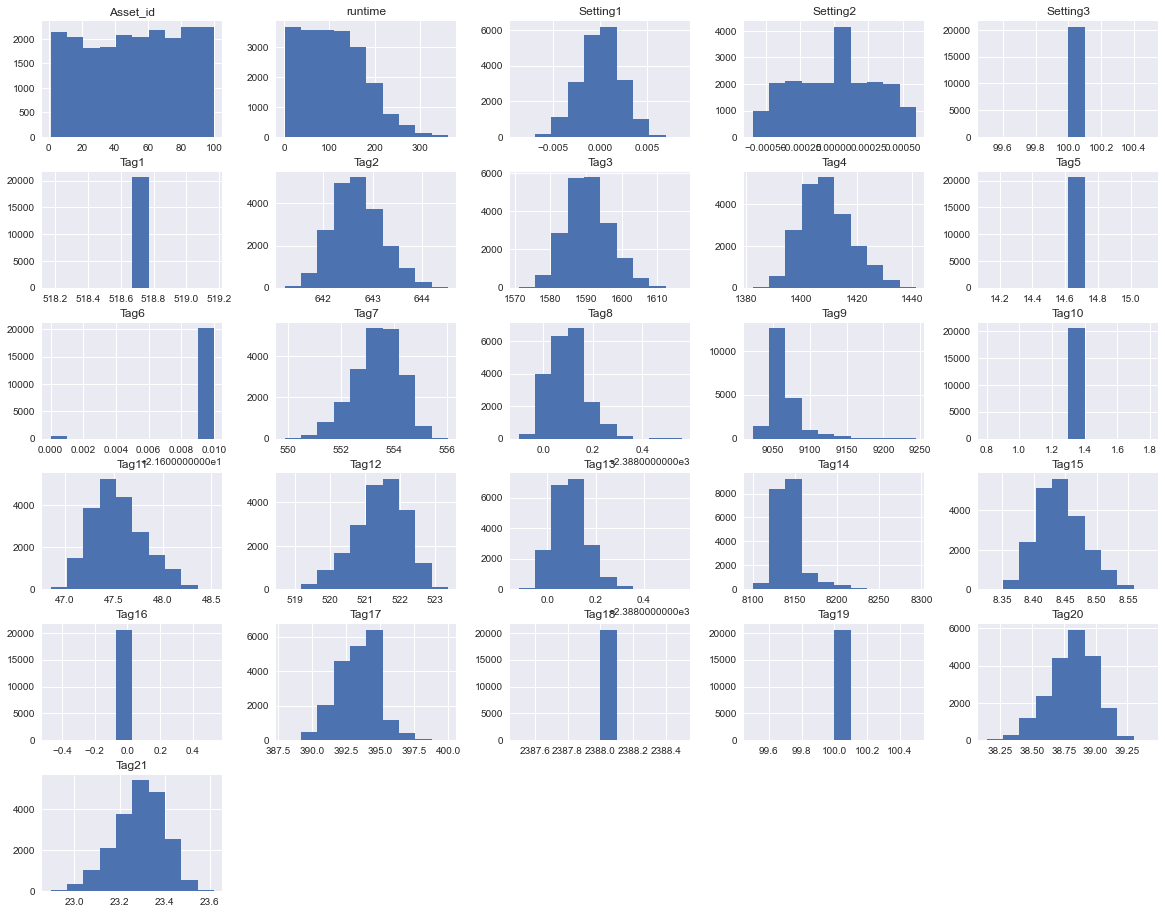

In [15]:
# Checagem da distribuição de cada variável
train.hist(figsize=(20,16)) 
plt.show()

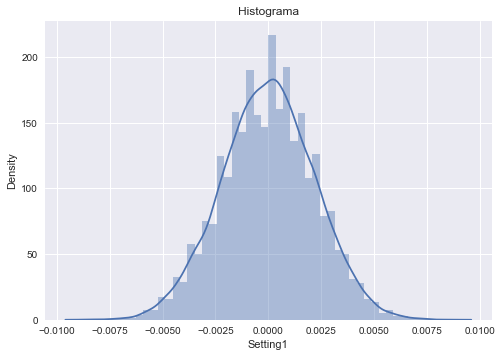

<Figure size 216x216 with 0 Axes>

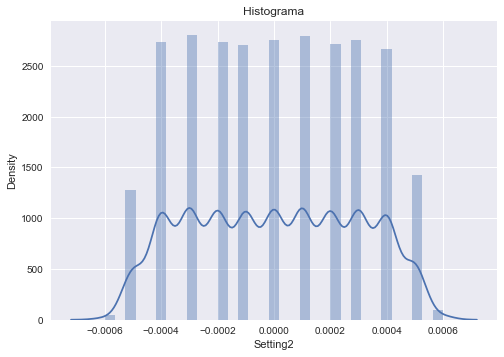

<Figure size 216x216 with 0 Axes>

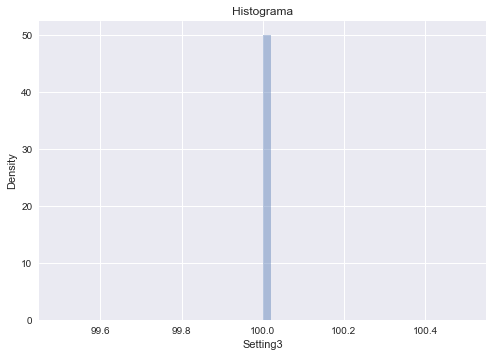

<Figure size 216x216 with 0 Axes>

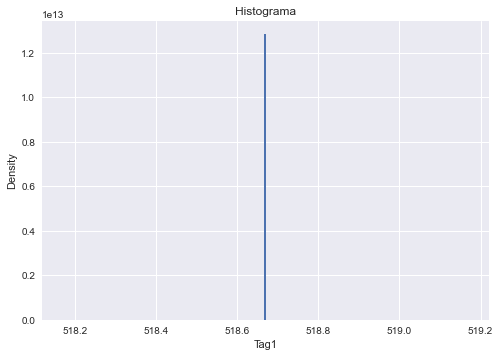

<Figure size 216x216 with 0 Axes>

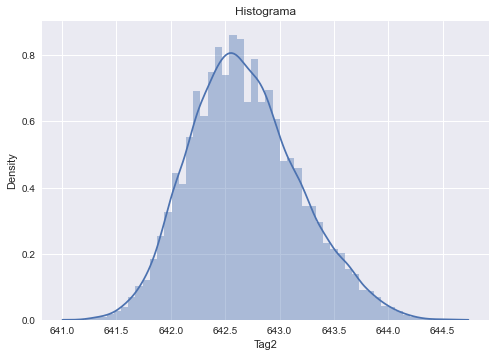

<Figure size 216x216 with 0 Axes>

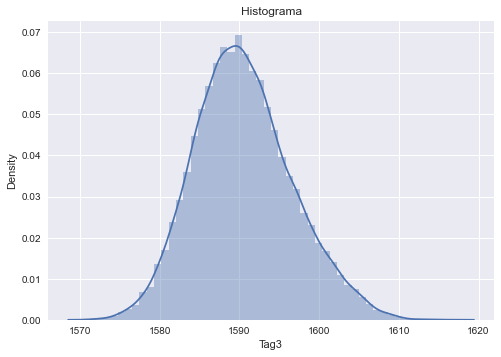

<Figure size 216x216 with 0 Axes>

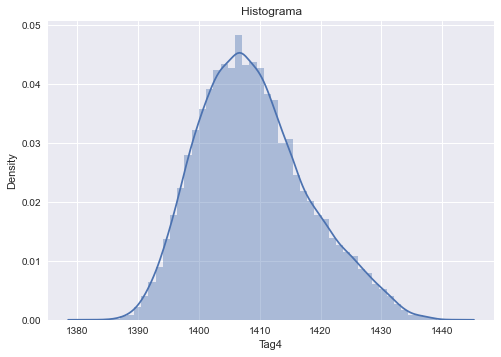

<Figure size 216x216 with 0 Axes>

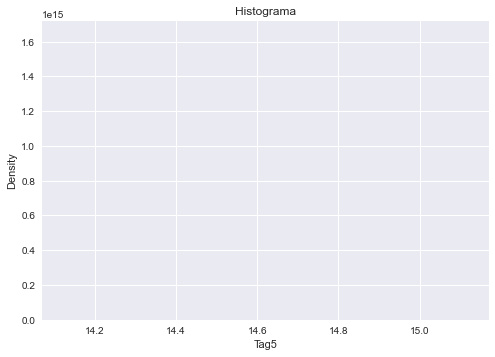

<Figure size 216x216 with 0 Axes>

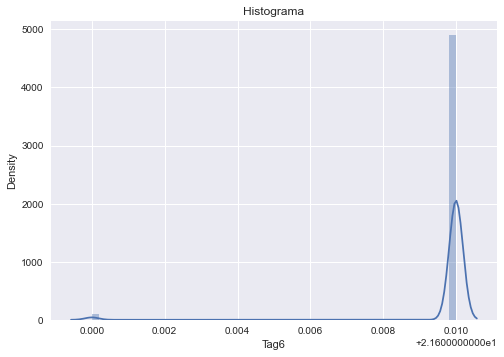

<Figure size 216x216 with 0 Axes>

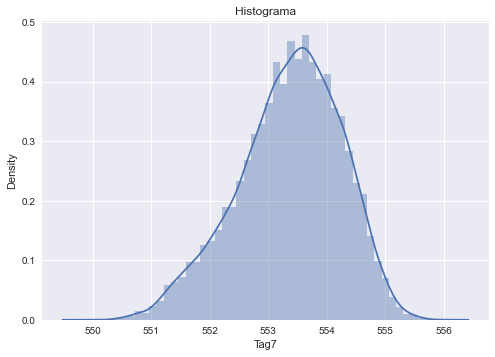

<Figure size 216x216 with 0 Axes>

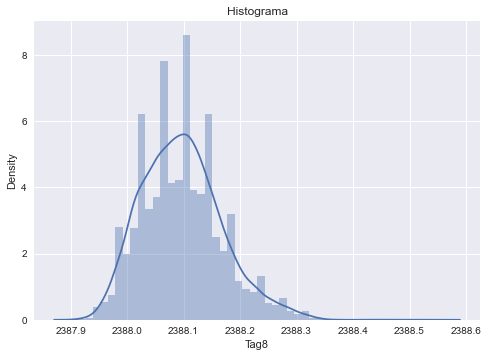

<Figure size 216x216 with 0 Axes>

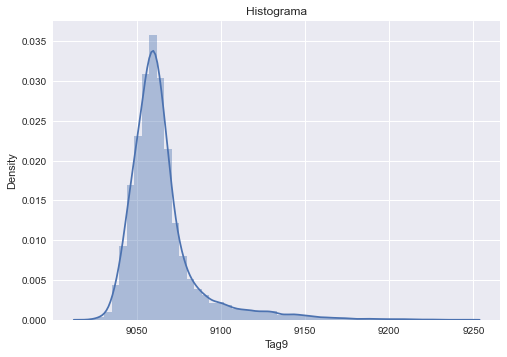

<Figure size 216x216 with 0 Axes>

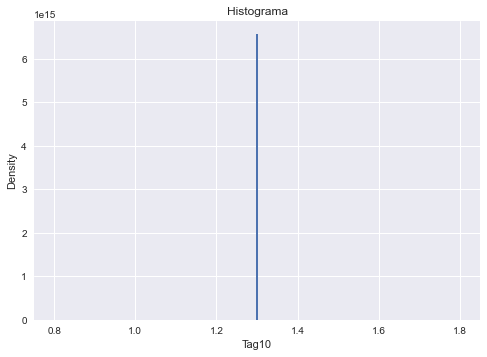

<Figure size 216x216 with 0 Axes>

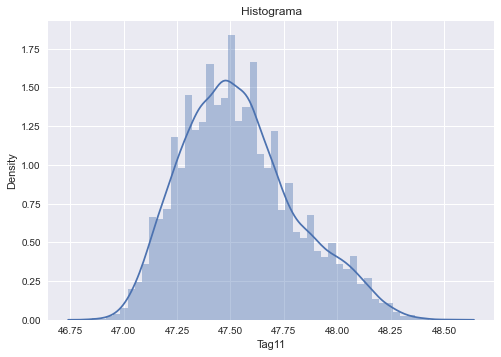

<Figure size 216x216 with 0 Axes>

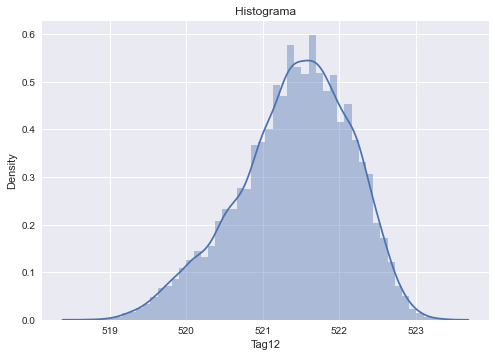

<Figure size 216x216 with 0 Axes>

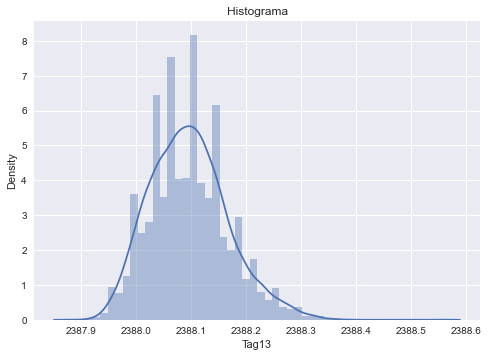

<Figure size 216x216 with 0 Axes>

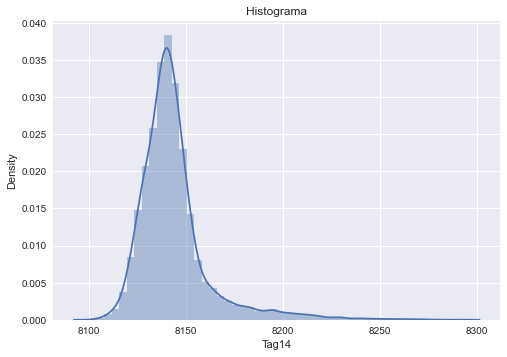

<Figure size 216x216 with 0 Axes>

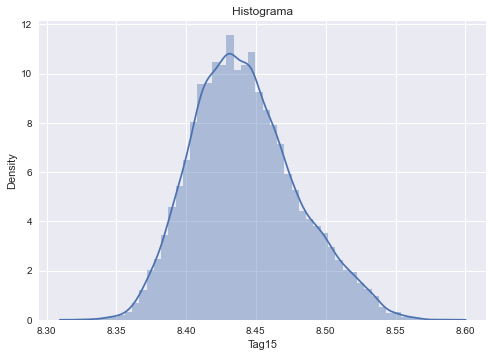

<Figure size 216x216 with 0 Axes>

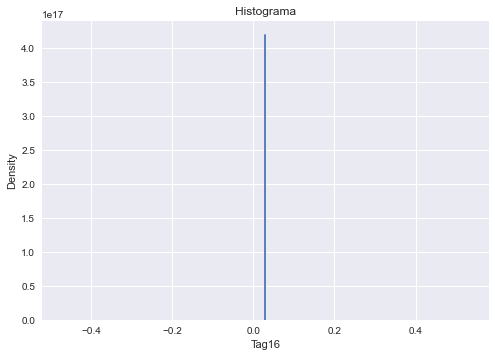

<Figure size 216x216 with 0 Axes>

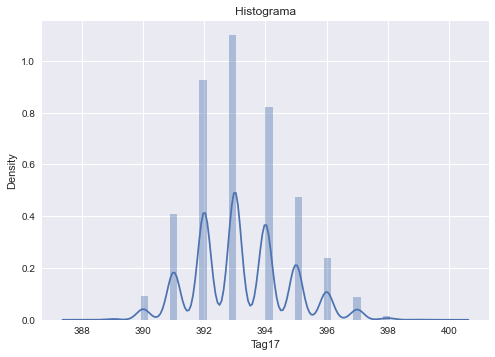

<Figure size 216x216 with 0 Axes>

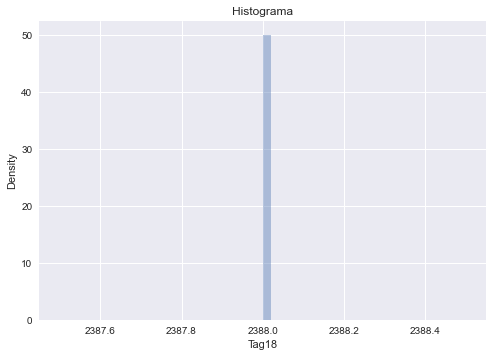

<Figure size 216x216 with 0 Axes>

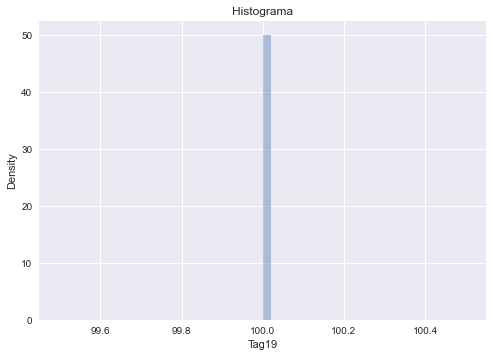

<Figure size 216x216 with 0 Axes>

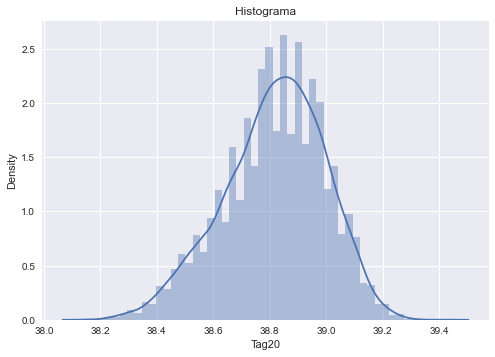

<Figure size 216x216 with 0 Axes>

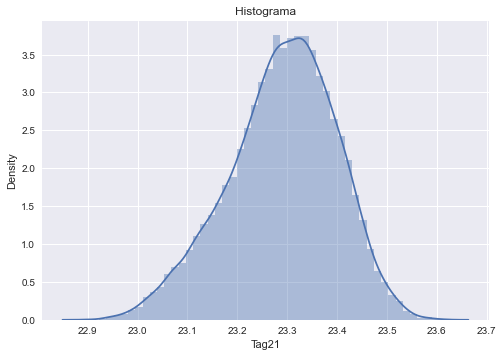

<Figure size 216x216 with 0 Axes>

In [16]:
# Histogramas: As features apresentam distribuição normal?
features = ['Setting1', 'Setting2', 'Setting3', 'Tag1',
       'Tag2', 'Tag3', 'Tag4', 'Tag5', 'Tag6', 'Tag7', 'Tag8', 'Tag9', 'Tag10',
       'Tag11', 'Tag12', 'Tag13', 'Tag14', 'Tag15', 'Tag16', 'Tag17', 'Tag18',
       'Tag19', 'Tag20', 'Tag21']

for item in features:
    sns.distplot(train[item])
    plt.title('Histograma')
    plt.figure(figsize=(3,3))
    plt.show() 

In [17]:
#valores distintos para cada coluna
train.nunique()

Asset_id     100
runtime      362
Setting1     158
Setting2      13
Setting3       1
Tag1           1
Tag2         310
Tag3        3012
Tag4        4051
Tag5           1
Tag6           2
Tag7         513
Tag8          53
Tag9        6403
Tag10          1
Tag11        159
Tag12        427
Tag13         56
Tag14       6078
Tag15       1918
Tag16          1
Tag17         13
Tag18          1
Tag19          1
Tag20        120
Tag21       4745
dtype: int64

In [18]:
train.describe() #describe funciona apenas para variáveis numéricas

,Asset_id,runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag12,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [19]:
train.skew()

Asset_id   -0.067815
runtime     0.499904
Setting1   -0.024766
Setting2    0.009085
Setting3    0.000000
Tag1        0.000000
Tag2        0.316526
Tag3        0.308946
Tag4        0.443194
Tag5        0.000000
Tag6       -6.916813
Tag7       -0.394329
Tag8        0.479411
Tag9        2.555365
Tag10       0.000000
Tag11       0.469329
Tag12      -0.442407
Tag13       0.469792
Tag14       2.372554
Tag15       0.388259
Tag16       0.000000
Tag17       0.353126
Tag18       0.000000
Tag19       0.000000
Tag20      -0.358445
Tag21      -0.350375
dtype: float64

In [ ]:
#definindo variáveis categoricas
for col in ['Setting3', 'Setting2', 'Tag1', 'Tag5', 'Tag6', 'Tag10', 'Tag16','Tag17','Tag18','Tag9']:
    train[col] = train[col].astype('category')

train.dtypes

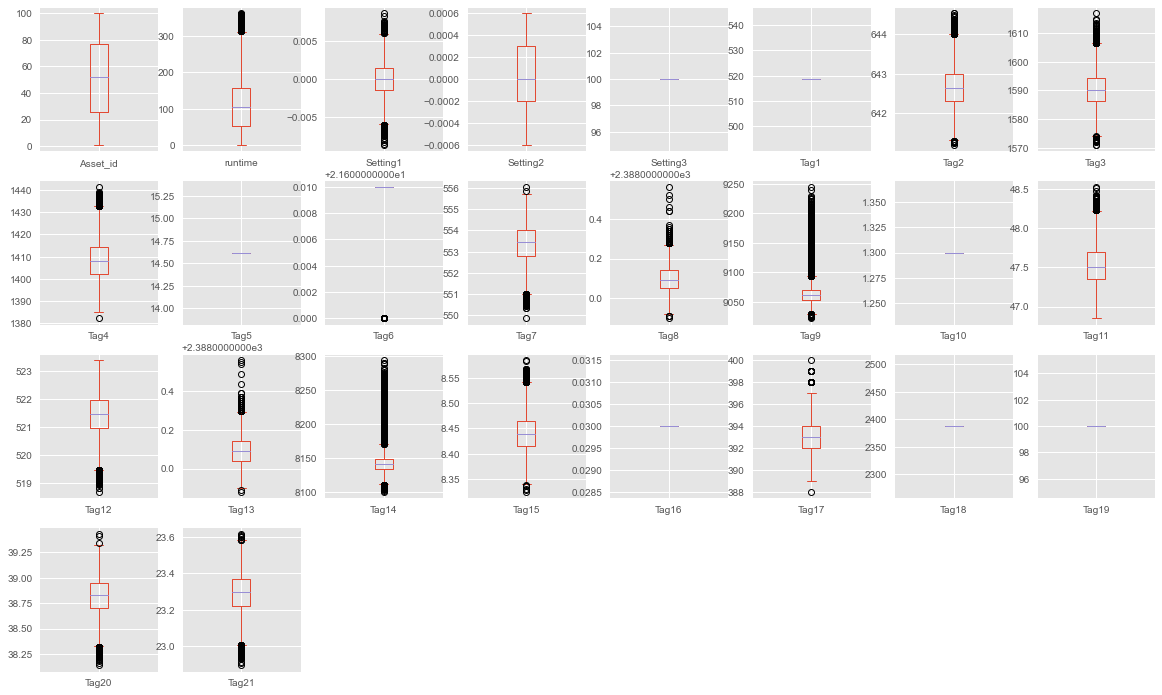

In [24]:
# Box and Whisker Plots
plt.style.use("ggplot")
train.plot(kind = 'box', subplots = True, layout = (8,8), sharex = False, sharey = False, figsize=(20,25))
plt.show()

In [25]:
#verificação de dado duplicado dentro do dataset
train.duplicated().sum()

0

### Feature Engineering

#### Creation of feature and new dataset - RUL
Target variable: RUL 'remaining useful life' ou seja, o tempo de vida até a falha total que é uma subtração (initial condition - minimum acceptable condition)

In [5]:
# Criação de um novo dataset com os valores máximos de ciclos para cada id
df_rul_train = pd.DataFrame(train.groupby('Asset_id')['runtime'].max()).reset_index()
df_rul_train.columns = ['Asset_id', 'max_cycle']

#mesma coisa para os dados de treino
df_rul_test = pd.DataFrame(test.groupby('Asset_id')['runtime'].max()).reset_index()
df_rul_test.columns = ['Asset_id', 'max_cycle']

#visualização do dataset criado
df_rul_train

,Asset_id,max_cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [6]:
train_rul = train.merge(df_rul_train, on=['Asset_id'], how='left') #join do dataframe original com o dataframe com ciclos máximos
train_rul['RUL'] = train_rul['max_cycle'] - train_rul['runtime'] #calculo de RUL para cada ciclo

test_rul = test.merge(df_rul_test, on=['Asset_id'], how='left') 
test_rul['RUL'] = test_rul['max_cycle'] - test_rul['runtime'] 

# A variável target passa a ser a coluna RUL, portanto, as colunas asset_id, runtime e max_cycle não serão necessárias
train_rul.drop(['max_cycle', 'Asset_id', 'runtime'], axis=1, inplace=True)
test_rul.drop(['max_cycle', 'Asset_id', 'runtime'], axis=1, inplace=True)


In [28]:
train_rul

,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,...,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,RUL
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


#### Outilier detection

In [ ]:
from pyod.models.knn import KNN
from pyod.models.ecod import ECOD

detector = ECOD()
detector.fit(train_rul.iloc[:,0:24])

previsoes = detector.labels_
np.unique(previsoes, return_counts=True) 


In [ ]:
outliers = []
for i in range(len(previsoes)):
    if previsoes[i]==1:
        outliers.append(i)

df_outliers = train_rul.iloc[outliers,:]
df_outliers

In [ ]:
teste = train_rul.iloc[ ~train_rul.index.isin(outliers) ,:]

In [ ]:
# Box and Whisker Plots
teste.plot(kind = 'box', subplots = True, layout = (5,8), sharex = False, sharey = False, figsize=(30,20))
plt.show()

#### #2 Outilier detection

Detecção de Outlier - Método por Amplitude de Interquartis IQR

In [9]:
def outliers (df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    return ls 

In [10]:
train_rul.columns

Index(['Setting1', 'Setting2', 'Setting3', 'Tag1', 'Tag2', 'Tag3', 'Tag4',
       'Tag5', 'Tag6', 'Tag7', 'Tag8', 'Tag9', 'Tag10', 'Tag11', 'Tag12',
       'Tag13', 'Tag14', 'Tag15', 'Tag16', 'Tag17', 'Tag18', 'Tag19', 'Tag20',
       'Tag21', 'RUL'],
      dtype='object')

In [11]:
index_list = []
colunas = ['Setting1', 'Setting2', 'Setting3', 'Tag1', 'Tag2', 'Tag3', 'Tag4','Tag5', 'Tag6', 'Tag7', 'Tag8', 'Tag9', 'Tag10', 'Tag11', 'Tag12','Tag13', 'Tag14', 'Tag15', 'Tag16', 'Tag17', 'Tag18', 'Tag19', 'Tag20','Tag21']
for col in colunas:
    index_list.extend(outliers(train_rul, col))

In [12]:
len(index_list)

5511

In [13]:
#novo dataset sem outliers 
train_cleaned = train_rul.iloc[ ~train_rul.index.isin(index_list) ,:]

In [38]:
train_cleaned

,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,...,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,RUL
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20617,0.0015,0.0002,100.0,518.67,643.63,1596.96,1421.49,14.62,21.61,551.53,...,2388.22,8140.49,8.5087,0.03,396,2388,100.0,38.67,23.2308,13
20619,0.0015,0.0001,100.0,518.67,643.69,1599.85,1423.15,14.62,21.61,551.61,...,2388.24,8139.78,8.4870,0.03,397,2388,100.0,38.65,23.0591,11
20620,-0.0001,0.0002,100.0,518.67,643.12,1594.45,1426.04,14.62,21.61,551.06,...,2388.26,8142.28,8.5162,0.03,395,2388,100.0,38.42,23.0603,10
20622,-0.0009,0.0001,100.0,518.67,643.53,1601.23,1419.48,14.62,21.61,551.14,...,2388.21,8143.46,8.4892,0.03,397,2388,100.0,38.56,23.0770,8


In [39]:
train_cleaned.describe()

,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,...,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,RUL
count,17718.000000,17718.000000,17718.0,1.771800e+04,17718.000000,17718.000000,17718.000000,1.771800e+04,1.771800e+04,17718.000000,...,17718.000000,17718.000000,17718.000000,1.771800e+04,17718.000000,17718.0,17718.0,17718.000000,17718.000000,17718.000000
mean,-0.000011,0.000003,100.0,5.186700e+02,642.609560,1589.606103,1407.520263,1.462000e+01,2.161000e+01,553.490198,...,2388.090016,8139.659668,8.436500,3.000000e-02,392.972796,2388.0,100.0,38.843038,23.305984,117.953099
std,0.002143,0.000293,0.0,6.389381e-11,0.442329,5.389983,7.734258,3.188651e-12,9.002831e-12,0.779112,...,0.065323,10.163358,0.032595,1.363531e-14,1.354709,0.0,0.0,0.158191,0.094454,64.228429
min,-0.006000,-0.000600,100.0,5.186700e+02,641.320000,1574.140000,1385.190000,1.462000e+01,2.161000e+01,551.020000,...,2387.910000,8110.720000,8.340000,3.000000e-02,389.000000,2388.0,100.0,38.330000,23.005300,1.000000
25%,-0.001500,-0.000200,100.0,5.186700e+02,642.300000,1585.870000,1401.980000,1.462000e+01,2.161000e+01,552.990000,...,2388.040000,8132.750000,8.413300,3.000000e-02,392.000000,2388.0,100.0,38.740000,23.244200,68.000000
50%,0.000000,-0.000000,100.0,5.186700e+02,642.590000,1589.470000,1407.080000,1.462000e+01,2.161000e+01,553.530000,...,2388.090000,8139.570000,8.434700,3.000000e-02,393.000000,2388.0,100.0,38.850000,23.309600,113.000000
75%,0.001500,0.000300,100.0,5.186700e+02,642.900000,1593.150000,1412.550000,1.462000e+01,2.161000e+01,554.050000,...,2388.130000,8145.987500,8.457900,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.372400,161.000000
max,0.006000,0.000600,100.0,5.186700e+02,644.010000,1606.550000,1432.760000,1.462000e+01,2.161000e+01,555.720000,...,2388.290000,8170.900000,8.541300,3.000000e-02,397.000000,2388.0,100.0,39.320000,23.582500,361.000000


In [ ]:
train_rul.select_dtypes(exclude = ['float64', 'int64']).columns

In [ ]:
#readequação das colunas no dataframe para padronização apenas das variáveis numéricas, portanto as variáveis categóricas irão para o final junto da variável target
#train_reordered = train_cleaned.reindex(columns=['Setting1', 'Tag2', 'Tag3', 'Tag4', 'Tag7', 'Tag8', 'Tag11', 'Tag12', 'Tag13', 'Tag14', 'Tag15', 'Tag19', 'Tag20', 'Tag21','Setting2', 'Setting3', 'Tag1', 'Tag5', 'Tag6', 'Tag9', 'Tag10', 'Tag16', 'Tag17', 'Tag18', 'RUL'])
#test_reordered = test_rul.reindex(columns=['Setting1', 'Tag2', 'Tag3', 'Tag4', 'Tag7', 'Tag8', 'Tag11', 'Tag12', 'Tag13', 'Tag14', 'Tag15', 'Tag19', 'Tag20', 'Tag21','Setting2', 'Setting3', 'Tag1', 'Tag5', 'Tag6', 'Tag9', 'Tag10', 'Tag16', 'Tag17', 'Tag18', 'RUL'])

In [42]:
train_cleaned

,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,...,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,RUL
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20617,0.0015,0.0002,100.0,518.67,643.63,1596.96,1421.49,14.62,21.61,551.53,...,2388.22,8140.49,8.5087,0.03,396,2388,100.0,38.67,23.2308,13
20619,0.0015,0.0001,100.0,518.67,643.69,1599.85,1423.15,14.62,21.61,551.61,...,2388.24,8139.78,8.4870,0.03,397,2388,100.0,38.65,23.0591,11
20620,-0.0001,0.0002,100.0,518.67,643.12,1594.45,1426.04,14.62,21.61,551.06,...,2388.26,8142.28,8.5162,0.03,395,2388,100.0,38.42,23.0603,10
20622,-0.0009,0.0001,100.0,518.67,643.53,1601.23,1419.48,14.62,21.61,551.14,...,2388.21,8143.46,8.4892,0.03,397,2388,100.0,38.56,23.0770,8


#### Normalization

In [14]:

array_norm = train_cleaned.values

# Separando o array em componentes de input (X) e output (Y)
X_norm = array_norm[:,0:24]
Y_norm = array_norm[:,24]

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X_norm)

#Concatenando as variáveis preditoras normalizadas com a variável target e transformando em um dataframe novo
train_rescaled = pd.concat([pd.DataFrame(rescaledX), pd.DataFrame(train_cleaned.iloc[:,24].values)], axis = 1, ignore_index = False)
train_rescaled.columns = train_cleaned.columns

#### Standardization

In [15]:
#Padrinização não altera a distribução dos dados, coloca-os em uma distribuição normal.
# Padronizando os dados (0 para a média, 1 para o desvio padrão)

array_std = train_cleaned.values

# Separando o array em componentes de input (X) e output (Y)
X_std = array_std[:,0:24] ##variáveis preditoras 

# Gerando o novo padrão
scaler = StandardScaler().fit(X_std) 
standardX = scaler.transform(X_std)

#Concatenando as variáveis preditoras normalizadas com a variável target e transformando em um dataframe novo

train_standard = pd.concat([pd.DataFrame(standardX), pd.DataFrame(train_cleaned.iloc[:,24].values)], axis = 1, ignore_index = False)
train_standard.columns =  train_cleaned.columns


### Feature Selection

<AxesSubplot:>

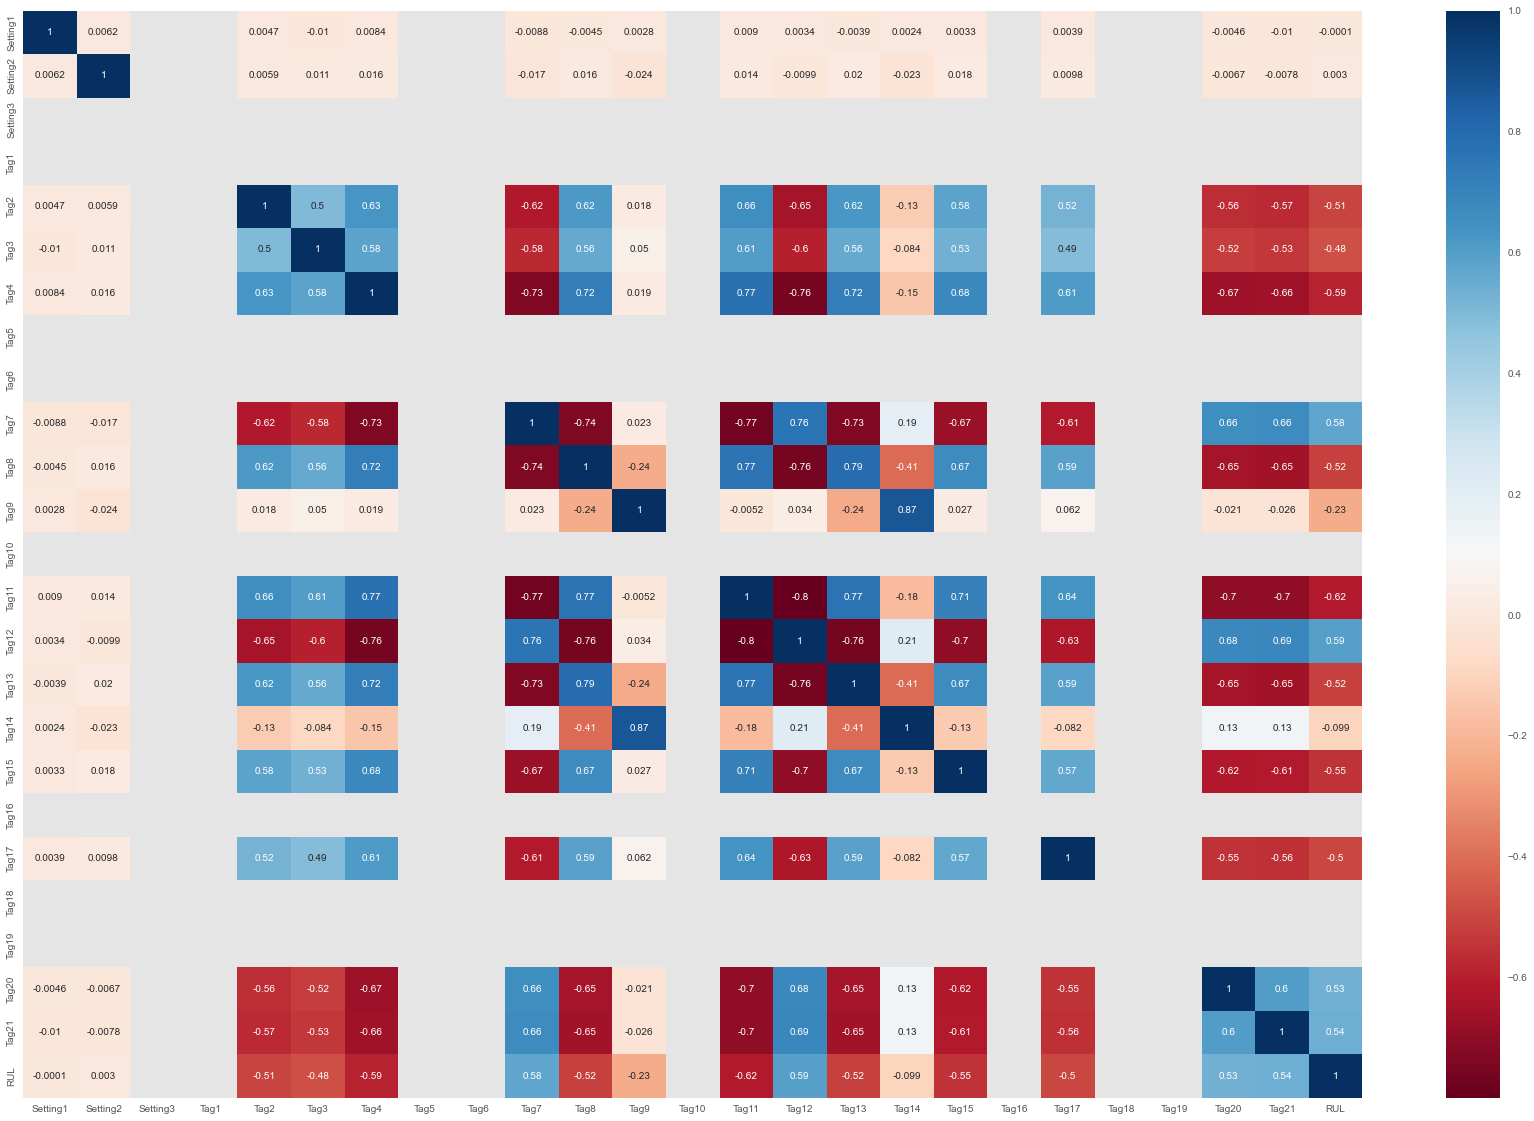

In [57]:
plt.figure(figsize=(30,20))
sns.heatmap(train_standard.corr(),annot=True,cmap='RdBu')

> Pelo heatmap as variáveis Seeting3, Tag1, Tag5, Tag10, Tag16, Tag18, Tag19 não apresentam correlação significante com a variável target que é RUL

In [58]:
# Explorando correlação entre variáveis preditoras e variável Target 'RUL'
train_standard.corr(method='pearson')['RUL'].sort_values(ascending=False)

RUL         1.000000
Tag12       0.593913
Tag7        0.576183
Tag21       0.538578
Tag20       0.532642
Setting2    0.002975
Setting1   -0.000104
Tag14      -0.098705
Tag9       -0.234288
Tag3       -0.478113
Tag17      -0.501587
Tag2       -0.508003
Tag8       -0.516351
Tag13      -0.516742
Tag15      -0.547086
Tag4       -0.591522
Tag11      -0.615100
Setting3         NaN
Tag1             NaN
Tag5             NaN
Tag6             NaN
Tag10            NaN
Tag16            NaN
Tag18            NaN
Tag19            NaN
Name: RUL, dtype: float64

> Pela correlação pelo método de Pearson as variáveis Seeting1, Setting2, Seeting3, Tag1, Tag5, Tag10, Tag16, Tag18, Tag19 não apresentam correlação significante com a variável target que é RUL

In [59]:
##Seleção Univariada - f_classif

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = train_standard.iloc[:,0:24]
Y = train_standard.iloc[:,24]
#Suppose, we select 5 features with top 5 Fisher scores
selector = SelectKBest(f_classif, k = 24)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X,Y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted2 = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted2)

   Feat_names   F_Scores
13      Tag11  50.721758
14      Tag12  45.682359
6        Tag4  43.321509
9        Tag7  41.136995
17      Tag15  34.210335
23      Tag21  31.151588
22      Tag20  30.427741
15      Tag13  30.169621
10       Tag8  29.581198
4        Tag2  26.772885
19      Tag17  25.293192
5        Tag3  22.258552
11       Tag9   4.462499
16      Tag14   2.035973
0    Setting1   1.023141
1    Setting2   0.995267
2    Setting3        NaN
3        Tag1        NaN
12      Tag10        NaN
18      Tag16        NaN
20      Tag18        NaN
21      Tag19        NaN
7        Tag5        NaN
8        Tag6        NaN


> Pelo método de seleção univariada por f_classif as variáveis Seeting1, Setting2, Seeting3, Tag1, Tag5, Tag6, Tag10, Tag16, Tag18, Tag19 não apresentam correlação significante com a variável target que é RUL

> Pelos 3 métodos análisados para Feature Selection, apresentaram equiparação em relação as variáveis mais impactantes para a definicação de vida útil RUL, dessa formaa, essas variáveis serão excluidas do dataset para teste do modelo. Além disso, pelo heatmap é possível visuliazar multicolinearidade com as variáveis 'Tag9' e 'Tag14', a escolha será permanecer apenas com 'Tag9' pela sua correlação com RUL ser ligeiramente maior.

In [16]:
train_rescaled = train_rescaled[[ 'Tag2', 'Tag3', 'Tag4', 'Tag6', 'Tag7', 'Tag8', 'Tag9', 'Tag11', 'Tag12', 'Tag13', 'Tag15', 'Tag17', 'Tag20', 'Tag21','RUL']]
train_standard = train_standard[[ 'Tag2', 'Tag3', 'Tag4', 'Tag6', 'Tag7', 'Tag8', 'Tag9', 'Tag11', 'Tag12', 'Tag13', 'Tag15', 'Tag17', 'Tag20', 'Tag21','RUL']]
train_original = train_cleaned[[ 'Tag2', 'Tag3', 'Tag4', 'Tag6', 'Tag7', 'Tag8', 'Tag9', 'Tag11', 'Tag12', 'Tag13', 'Tag15', 'Tag17', 'Tag20', 'Tag21','RUL']]
teste_final = test_rul[[ 'Tag2', 'Tag3', 'Tag4', 'Tag6', 'Tag7', 'Tag8', 'Tag9', 'Tag11', 'Tag12', 'Tag13', 'Tag15', 'Tag17', 'Tag20', 'Tag21','RUL']]

### Multicollinearity

#### VIF (Variable Inflation Factors) method

In [ ]:
train_vif = train_original

In [70]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


X = train_standard.iloc[:,0:14]
calc_vif(X)

,variables,VIF
0,Tag2,2.078793
1,Tag3,1.798200
2,Tag4,3.414867
3,Tag6,1.000000
4,Tag7,3.390881
5,Tag8,4.046790
6,Tag9,1.419586
7,Tag11,4.456998
8,Tag12,4.051798
9,Tag13,4.059608


#### Eigenvalues and Eigenvectors method

In [ ]:
#Multicolinearidade com autovalores e autovetores

X = train_standard[['Tag2', 'Tag3', 'Tag4', 'Tag6', 'Tag7', 'Tag8', 'Tag9', 'Tag11', 'Tag12', 'Tag13', 'Tag14', 'Tag15', 'Tag17', 'Tag20', 'Tag21']]
corr = np.corrcoef(X, rowvar = 0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

In [ ]:
## Autovetores: Recombina a variância entre as variáveis, criando novos recursos acumulando toda a variância compartilhada. 
## autovalores/eigenvalues = representa a quantidade de variância recombinada para cada variável
## autovetores/ eigenvectors = matriz que diz como as ovas variáveis se relacionam com as antigas
## valores pequenos ou próximo a zero representa uma fonte elevada de multicolinearidade


In [ ]:
# procura do menor valor dentro dos autovalores
menor = min(eigenvalues)
index = np.where(eigenvalues == menor)
menor = index[0][0]
print(lista_menor)

In [ ]:
eigenvectors[:,menor]

In [ ]:
sorted(eigenvectors[:,menor])

In [ ]:
np.where(eigenvectors ==  -0.002229351955030473)

In [ ]:
type(eigenvectors[:,lista_menor])

In [ ]:
variables = df_train_standard.columns
print (variables[0], variables[1], variables[2], variables[3])

### Machine Learning

#### Load data

In [19]:
#---------NORMALIZADOS
array_rescaled = train_rescaled.values

seed = 15

# Separando o array em componentes de input e output
X_rescaled = array_rescaled[:,0:14]
Y_rescaled = array_rescaled[:,14]

X_trainN, X_testN, Y_trainN, Y_testN = train_test_split(X_rescaled, Y_rescaled, test_size = 0.33, random_state = seed)

#-----------PADRONIZADOS
array_standard = train_standard.values

seed = 15

# Separando o array em componentes de input e output
X_standard = array_standard[:,0:14]
Y_standard = array_standard[:,14]

X_trainS, X_testS, Y_trainS, Y_testS = train_test_split(X_standard, Y_standard, test_size = 0.33, random_state = seed)

#-------ORIGINAIS
array = train_original.values

seed = 15

# Separando o array em componentes de input e output
X = array[:,0:14]
Y = array[:,14]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = seed)

#### Metrics

* R^2: R2 score/coeficiente de determinação.
    - Fornece uma indicação do nível de precisão das previsões em relação aos valores observados/percentual da variância dos dados que é explicado pelo modelo.
    - Valores entre 0 e 1, sendo 0 o valor ideal.



* MSE - Mean Squared Error/Erro médio quadrado.
    - Similar ao MAE, fornece a magnitude do erro do modelo.
    - Quanto maior, pior é o modelo!
    - Mesma unidade de medida original / maior penalidade em erros grandes / impactado por outlier
    - Ao extrairmos a raiz quadrada do MSE convertemos as unidades de volta ao original, 
    - o que pode ser útil para descrição e apresentação. Isso é chamado RMSE (Root Mean Squared Error)

* MSLE: Mean squared logarithmic error 
    - Mais fácil de ser minimizado tecnicamente
    - A previsão não pode ser negativa para ser utilizada
    - Calcula o erro relativo
    - Melhor para escalas menores de previsão


* MAE: Mean Absolute Error/Erro médio absoluto
    - É a soma da diferença absoluta entre previsões e valores reais.
    - Fornece uma ideia de quão erradas estão nossas previsões.
    - Valor igual a 0 indica que não há erro, sendo a previsão perfeita.
    - O minizador é a mediana, penaliza menos os outliers

* MedAE
    - Calcula o erro em diferentes percentis

* MAPE: Mean absolute Percentual Error/Erro percentual absoluto médio
    - Porcentagem de erro em relação aos valores reais 




#### Radom Forest Regressor

In [20]:
# Criando o modelo
modelo1 =  RandomForestRegressor(n_estimators=1000, criterion="squared_error")

# Treinando o modelo
modelo1.fit(X_trainS, Y_trainS)

# Fazendo previsões
Y_pred1 = modelo1.predict(X_testS)

# Resultado
print('R2 Score: %.2f' % r2_score(Y_testS, Y_pred1))
print("MSE - Mean Squared Error:", mean_squared_error(Y_testS, Y_pred1))
print('MAE - Erro médio absoluto: %.2f' % mean_absolute_error(Y_testS, Y_pred1))
print('MedAE - Erro mediano absoluto: %.2f' % median_absolute_error(Y_testS, Y_pred1))
print('MAPE - Erro percentual absoluto médio: %.2f' % mean_absolute_percentage_error(Y_testS, Y_pred1)) 


R2 Score: 0.53
MSE - Mean Squared Error: 1967.659635242347
MAE - Erro médio absoluto: 33.02
MedAE - Erro mediano absoluto: 24.77
MAPE - Erro percentual absoluto médio: 0.35


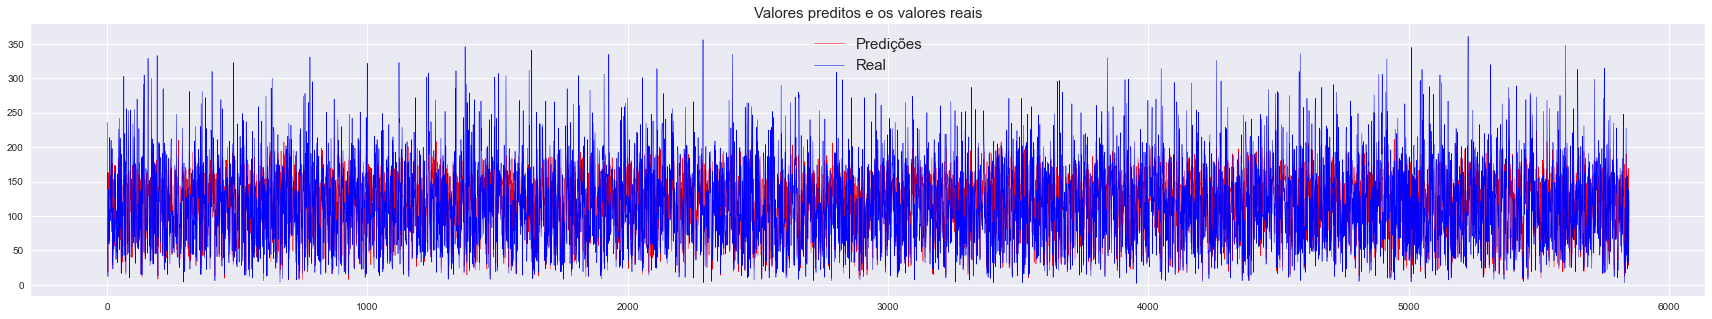

In [22]:
plt.style.use("seaborn")
plt.figure(figsize=(30,5))
plt.plot(Y_pred1, linewidth=0.5, color='r')
plt.plot(Y_testS, linewidth=0.5,color='b')
plt.title('Valores preditos e os valores reais',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

#### Linear Regression

In [75]:
# Criando o modelo
modelo2 = LinearRegression()

# Treinando o modelo
modelo2.fit(X_trainN, Y_trainN)

# Fazendo previsões
Y_pred2 = modelo2.predict(X_testN)

# Resultado
print('R2 Score: %.2f' % r2_score(Y_testN, Y_pred2))
print("MSE - Mean Squared Error:", mean_squared_error(Y_testN, Y_pred2))
print('MAE - Erro médio absoluto: %.2f' % mean_absolute_error(Y_testN, Y_pred2))
print('MedAE - Erro mediano absoluto: %.2f' % median_absolute_error(Y_testN, Y_pred2))
print('MAPE - Erro percentual absoluto médio: %.2f' % mean_absolute_percentage_error(Y_testN, Y_pred2)) 

R2 Score: 0.51
MSE - Mean Squared Error: 2060.387805392726
MAE - Erro médio absoluto: 34.67
MedAE - Erro mediano absoluto: 28.00
MAPE - Erro percentual absoluto médio: 0.42


#### Ridge Regression

In [76]:
# Criando o modelo
modelo3 = Ridge()

# Treinando o modelo
modelo3.fit(X_trainN, Y_trainN)

# Fazendo previsões
Y_pred3 = modelo3.predict(X_testN)

# Resultado
print('R2 Score: %.2f' % r2_score(Y_testN, Y_pred3))
print("MSE - Mean Squared Error:", mean_squared_error(Y_testN, Y_pred3))
print('MAE - Erro médio absoluto: %.2f' % mean_absolute_error(Y_testN, Y_pred3))
print('MedAE - Erro mediano absoluto: %.2f' % median_absolute_error(Y_testN, Y_pred3))
print('MAPE - Erro percentual absoluto médio: %.2f' % mean_absolute_percentage_error(Y_testN, Y_pred3)) 

R2 Score: 0.51
MSE - Mean Squared Error: 2060.3918579231895
MAE - Erro médio absoluto: 34.67
MedAE - Erro mediano absoluto: 28.01
MAPE - Erro percentual absoluto médio: 0.42


#### Lasso Regression 

In [77]:
from sklearn.linear_model import Lasso

# Criando o modelo
modelo4 = Lasso()

# Treinando o modelo
modelo4.fit(X_trainN, Y_trainN)

# Fazendo previsões
Y_pred4 = modelo4.predict(X_testN)

# Resultado
print('R2 Score: %.2f' % r2_score(Y_testN, Y_pred4))
print("MSE - Mean Squared Error:", mean_squared_error(Y_testN, Y_pred4))
print('MAE - Erro médio absoluto: %.2f' % mean_absolute_error(Y_testN, Y_pred4))
print('MedAE - Erro mediano absoluto: %.2f' % median_absolute_error(Y_testN, Y_pred4))
print('MAPE - Erro percentual absoluto médio: %.2f' % mean_absolute_percentage_error(Y_testN, Y_pred4)) 

R2 Score: 0.48
MSE - Mean Squared Error: 2159.505354855877
MAE - Erro médio absoluto: 35.68
MedAE - Erro mediano absoluto: 29.49
MAPE - Erro percentual absoluto médio: 0.44


#### ElasticNet Regression

In [78]:
# Criando o modelo
modelo5 = ElasticNet()

# Treinando o modelo
modelo5.fit(X_trainN, Y_trainN)

# Fazendo previsões
Y_pred5 = modelo5.predict(X_testN)

# Resultado
print('R2 Score: %.2f' % r2_score(Y_testN, Y_pred5))
print("MSE - Mean Squared Error:", mean_squared_error(Y_testN, Y_pred5))
print('MAE - Erro médio absoluto: %.2f' % mean_absolute_error(Y_testN, Y_pred5))
print('MedAE - Erro mediano absoluto: %.2f' % median_absolute_error(Y_testN, Y_pred5))
print('MAPE - Erro percentual absoluto médio: %.2f' % mean_absolute_percentage_error(Y_testN, Y_pred5)) 

R2 Score: 0.22
MSE - Mean Squared Error: 3272.2137407657106
MAE - Erro médio absoluto: 46.57
MedAE - Erro mediano absoluto: 43.05
MAPE - Erro percentual absoluto médio: 0.79


#### KNN Regressor 

In [79]:
# Criando o modelo
modelo6 = KNeighborsRegressor()

# Treinando o modelo
modelo6.fit(X_trainN, Y_trainN)

# Fazendo previsões
Y_pred6 = modelo6.predict(X_testN)

# Resultado
print('R2 Score: %.2f' % r2_score(Y_testN, Y_pred6))
print("MSE - Mean Squared Error:", mean_squared_error(Y_testN, Y_pred6))
print('MAE - Erro médio absoluto: %.2f' % mean_absolute_error(Y_testN, Y_pred6))
print('MedAE - Erro mediano absoluto: %.2f' % median_absolute_error(Y_testN, Y_pred6))
print('MAPE - Erro percentual absoluto médio: %.2f' % mean_absolute_percentage_error(Y_testN, Y_pred6)) 

R2 Score: 0.44
MSE - Mean Squared Error: 2323.757352488455
MAE - Erro médio absoluto: 35.62
MedAE - Erro mediano absoluto: 26.20
MAPE - Erro percentual absoluto médio: 0.37


#### CART - Decision Tree Regressor

In [81]:
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo
modelo7 = DecisionTreeRegressor()

# Treinando o modelo
modelo7.fit(X_trainN, Y_trainN)

# Fazendo previsões
Y_pred7 = modelo7.predict(X_testN)

# Resultado
print('R2 Score: %.2f' % r2_score(Y_testN, Y_pred7))
print("MSE - Mean Squared Error:", mean_squared_error(Y_testN, Y_pred7))
print('MAE - Erro médio absoluto: %.2f' % mean_absolute_error(Y_testN, Y_pred7))
print('MedAE - Erro mediano absoluto: %.2f' % median_absolute_error(Y_testN, Y_pred7))
print('MAPE - Erro percentual absoluto médio: %.2f' % mean_absolute_percentage_error(Y_testN, Y_pred7)) 

R2 Score: 0.04
MSE - Mean Squared Error: 4034.977082264409
MAE - Erro médio absoluto: 46.39
MedAE - Erro mediano absoluto: 33.00
MAPE - Erro percentual absoluto médio: 0.47


#### SVM

In [82]:
from sklearn.svm import SVR

# Criando o modelo
modelo8 = SVR()

# Treinando o modelo
modelo8.fit(X_trainN, Y_trainN)

# Fazendo previsões
Y_pred8 = modelo8.predict(X_testN)

# Resultado
print('R2 Score: %.2f' % r2_score(Y_testN, Y_pred8))
print("MSE - Mean Squared Error:", mean_squared_error(Y_testN, Y_pred8))
print('MAE - Erro médio absoluto: %.2f' % mean_absolute_error(Y_testN, Y_pred8))
print('MedAE - Erro mediano absoluto: %.2f' % median_absolute_error(Y_testN, Y_pred8))
print('MAPE - Erro percentual absoluto médio: %.2f' % mean_absolute_percentage_error(Y_testN, Y_pred8)) 

R2 Score: 0.52
MSE - Mean Squared Error: 2018.0741355919672
MAE - Erro médio absoluto: 32.65
MedAE - Erro mediano absoluto: 23.74
MAPE - Erro percentual absoluto médio: 0.34


In [24]:
teste_final

,Tag2,Tag3,Tag4,Tag6,Tag7,Tag8,Tag9,Tag11,Tag12,Tag13,Tag15,Tag17,Tag20,Tag21,RUL
0,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8.4052,392,38.86,23.3735,30
1,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393,39.02,23.3916,29
2,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,28
3,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,27
4,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,643.24,1599.45,1415.79,21.61,553.41,2388.02,9142.37,47.69,520.69,2388.00,8.4715,394,38.65,23.1974,4
13092,643.22,1595.69,1422.05,21.61,553.22,2388.05,9140.68,47.60,521.05,2388.09,8.4512,395,38.57,23.2771,3
13093,643.44,1593.15,1406.82,21.61,553.04,2388.11,9146.81,47.57,521.18,2388.04,8.4569,395,38.62,23.2051,2
13094,643.26,1594.99,1419.36,21.61,553.37,2388.07,9148.85,47.61,521.33,2388.08,8.4711,395,38.66,23.2699,1


> Radom Forest é o que apresenta melhor resultado de R2 score, dessa forma, iremos selecionar este modelo para rodar a base de teste.

In [26]:
#---Padronização dos dados de teste
array_teste = teste_final.values

X_test_final = array_teste[:,0:14] 

scaler = StandardScaler().fit(X_test_final) 
standardX_test = scaler.transform(X_test_final)

test_standard = pd.concat([pd.DataFrame(standardX_test), pd.DataFrame(teste_final.iloc[:,14].values)], axis = 1, ignore_index = False)
test_standard.columns =  teste_final.columns

#---Modelo
array_teste = test_standard.values

X_test_final = array_teste[:,0:14]
Y_test_final = array_teste[:,14]
Y_pred_test = modelo1.predict(X_test_final)

# Resultado
print('R2 Score: %.2f' % r2_score(Y_test_final, Y_pred_test))
print("MSE - Mean Squared Error:", mean_squared_error(Y_test_final, Y_pred_test))
print('MAE - Erro médio absoluto: %.2f' % mean_absolute_error(Y_test_final, Y_pred_test))
print('MedAE - Erro mediano absoluto: %.2f' % median_absolute_error(Y_test_final, Y_pred_test))
print('MAPE - Erro percentual absoluto médio: %.2f' % mean_absolute_percentage_error(Y_test_final, Y_pred_test)) 


R2 Score: -0.71
MSE - Mean Squared Error: 4816.102410245341
MAE - Erro médio absoluto: 56.76
MedAE - Erro mediano absoluto: 50.43
MAPE - Erro percentual absoluto médio: 2638193255386264.00


## Conclusão:
O R2 score deu negativo, entende-se que o tipo de dado de entrada para o dataset de teste não representa o mesmo comportamento do dataset de treino, dessa forma, seriam necessárias análises mais profundas.
Pode-se concluir que o dataset de teste não pode ser utilizado para validação dos modelos, pois contém dados que o modelo não aprendeu.

# Melhorias a serem feitas:
- visualização dos resíduos de regressão
- Teste de modelos ensemble sofisticado: Gradient Boosting e XGBoost
- Tunning de hiperparâmetros do melhor modelo
- Mais testes de colinearidade dos dados e aplicação nos modelos
- Análise mais profunda de outliers